***
# Minor Project
***

In [33]:
import  numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_approval_data.csv")

In [3]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

***
## handling missing values
***

df.select_dtypes --> select datatypes 

df.select_dtypes(include = ["object"]) --> select objects -> categorical values

df.select_dtypes(include = ["float64"]) --> select float64-> numerical values

In [4]:
categorical_cols = df.select_dtypes(include = ["object"]).columns
#numerical_cols = df.select_dtypes(include = ["float64" , "int64"]).columns
numerical_cols = df.select_dtypes(include = ["number"]).columns

In [5]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [6]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

***
### sklearn imputer - for completing missing values with simple strategies

#### replace missing values use a descriptive statistics (e.g. mean,median,mode(most_frequent))
***

In [7]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy = "mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

cat_imp = SimpleImputer(strategy = "most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [8]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [9]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

***
# EDA
***

Text(0.5, 1.0, 'Is loan approved')

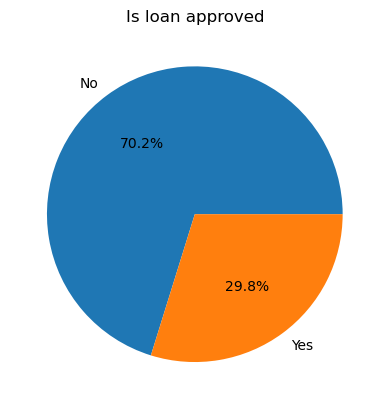

In [10]:
# check how balanced our calss is ?

classes_count = df["Loan_Approved"].value_counts() # returns a pandas series representing count of each class

plt.pie(classes_count,  labels=["No","Yes"] , autopct = "%1.1f%%")
plt.title("Is loan approved")

[Text(0, 0, '621'), Text(0, 0, '379')]

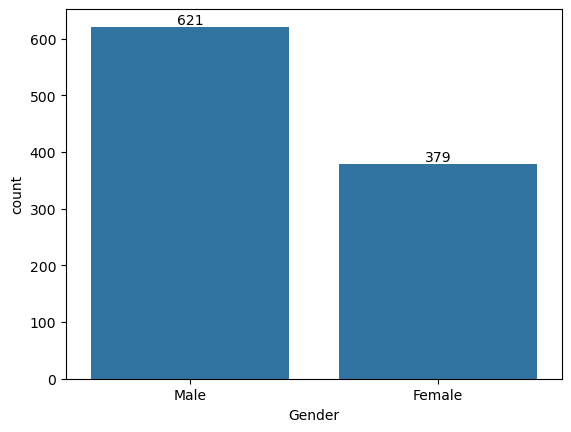

In [11]:
# analyze categories

gender_cnt = df["Gender"].value_counts() # count the categories
ax = sns.barplot(gender_cnt) # plot bar chart of counts vs gender
ax.bar_label(ax.containers[0]) # display values on bars

[Text(0, 0, '722'), Text(0, 0, '278')]

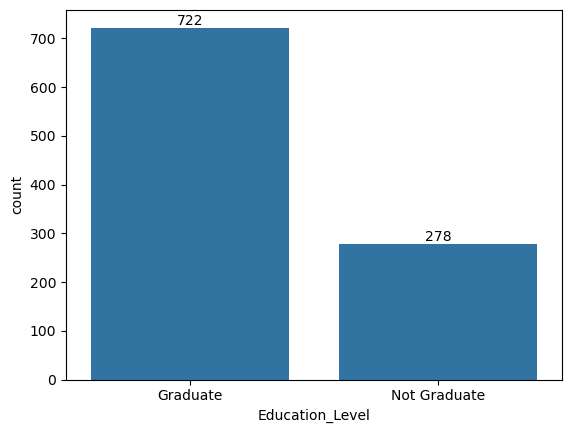

In [12]:
edu_cnt = df["Education_Level"].value_counts() # count the categories
ax = sns.barplot(edu_cnt) # plot bar chart of counts vs gender
ax.bar_label(ax.containers[0]) # display values on bars

[Text(0, 0, '517'), Text(0, 0, '294'), Text(0, 0, '189')]

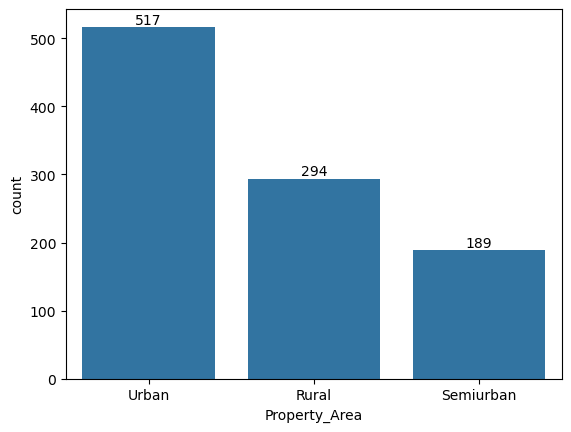

In [13]:
pro_area_cnt = df["Property_Area"].value_counts() # count the categories
ax = sns.barplot(pro_area_cnt) # plot bar chart of counts vs gender
ax.bar_label(ax.containers[0]) # display values on bars

[Text(0, 0, '643'), Text(0, 0, '357')]

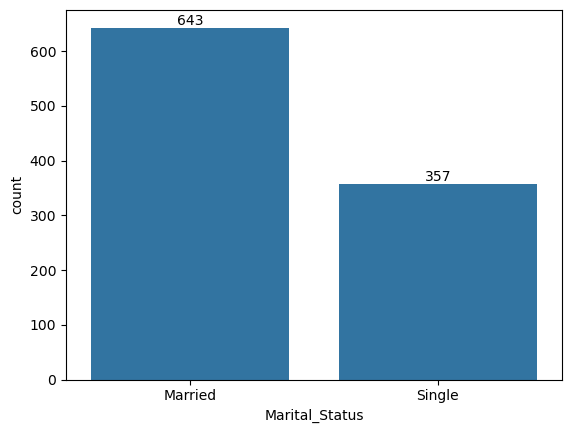

In [14]:
marital_stat = df["Marital_Status"].value_counts() # count the categories
ax = sns.barplot(marital_stat) # plot bar chart of counts vs gender
ax.bar_label(ax.containers[0]) # display values on bars

<Axes: xlabel='Applicant_Income', ylabel='Count'>

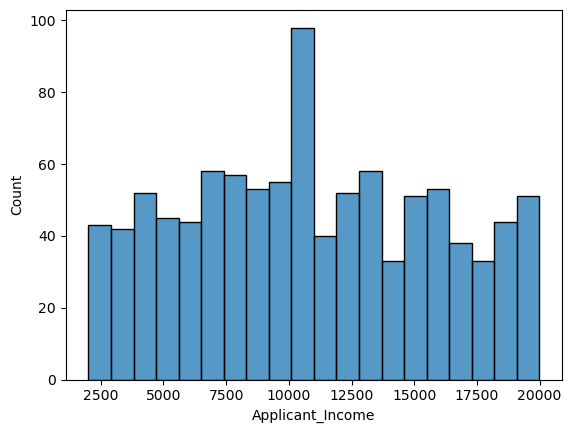

In [15]:
# analyze income

sns.histplot(
    data = df,
    x = "Applicant_Income",
    bins = 20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

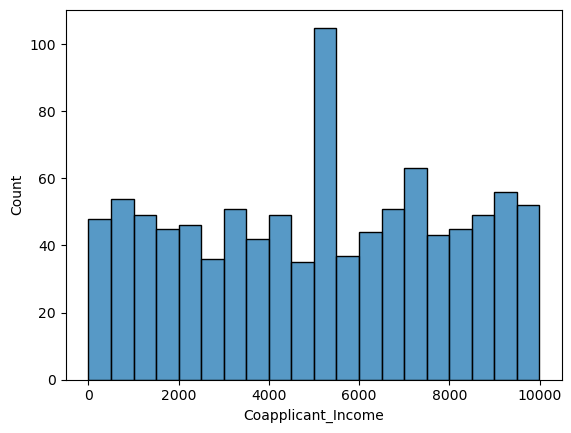

In [16]:
sns.histplot(
    data = df,
    x = "Coapplicant_Income",
    bins = 20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

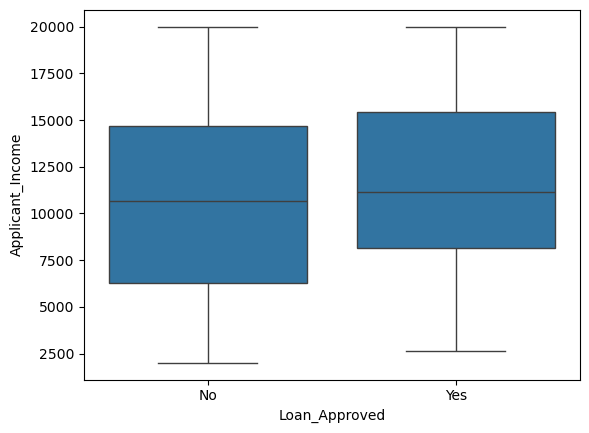

In [17]:
# outlier detection

sns.boxplot(
    data=df,
    x = "Loan_Approved",
    y = "Applicant_Income"
)

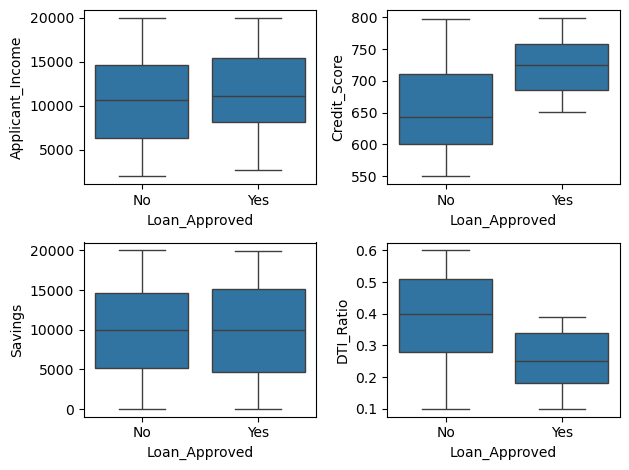

In [18]:
fig,axes= plt.subplots(2,2)

sns.boxplot(ax = axes[0,0], data=df, x = "Loan_Approved", y="Applicant_Income")
sns.boxplot(ax = axes[0,1], data=df, x = "Loan_Approved", y="Credit_Score")
sns.boxplot(ax = axes[1,1], data=df, x = "Loan_Approved", y="DTI_Ratio")
sns.boxplot(ax = axes[1,0], data=df, x = "Loan_Approved", y="Savings")

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

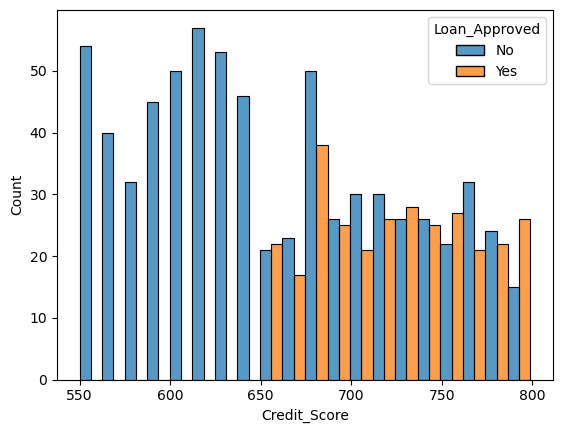

In [19]:
sns.histplot(
    data = df,
    x = "Credit_Score",
    hue = "Loan_Approved",
    bins = 20,
    multiple = "dodge" # removes overlapping
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

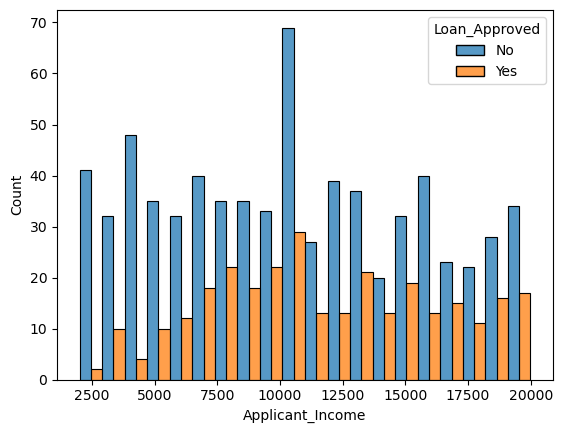

In [20]:
sns.histplot(
    data = df,
    x = "Applicant_Income",
    hue = "Loan_Approved",
    bins = 20,
    multiple = "dodge" # removes overlapping
)

In [21]:
# Remove Applicant_Id -->> unnecessary feature

df = df.drop("Applicant_ID", axis = 1)

In [22]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


***
## Feature Encoding
***

In [23]:
# encoding categorical features
# 1. LabelEncoder => when data is ordinal means order is important say : undergraduate, postgraduate, phd
# 2. OneHotEncoder => when data is Nominal means order is not important say : male or female

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])


In [25]:

cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Gender", "Employer_Category"]

ohe = OneHotEncoder(drop="first",sparse_output = False, handle_unknown = "ignore")

encoded = ohe.fit_transform(df[cols]) # returns an array need to convert to dataframe

encoded_df= pd.DataFrame(encoded , columns = ohe.get_feature_names_out(cols) , index = df.index)

# now append this data to df and drop original columns

df = pd.concat([df.drop(columns = cols) , encoded_df], axis = 1)

In [26]:
df.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


***
## Correlation Heatmap

### Visual representation of the relationship between numerical variables in a dataset

### it shows correlation coefficient (r) between two numeric variables

1. ranges from -1 to 1
2. 1 is perfect positive correlation
3. -1 is perfect negative correlation
4. 0 is no linear correlation

QUICK INSIGHTS
DETECT MULTICOLLINEARITY - SOLVED VIA PCA, DIM- REDUCTION, FEATURE SELECTION
DATA EXPLORATION
PREPROCESSING

***

<Axes: >

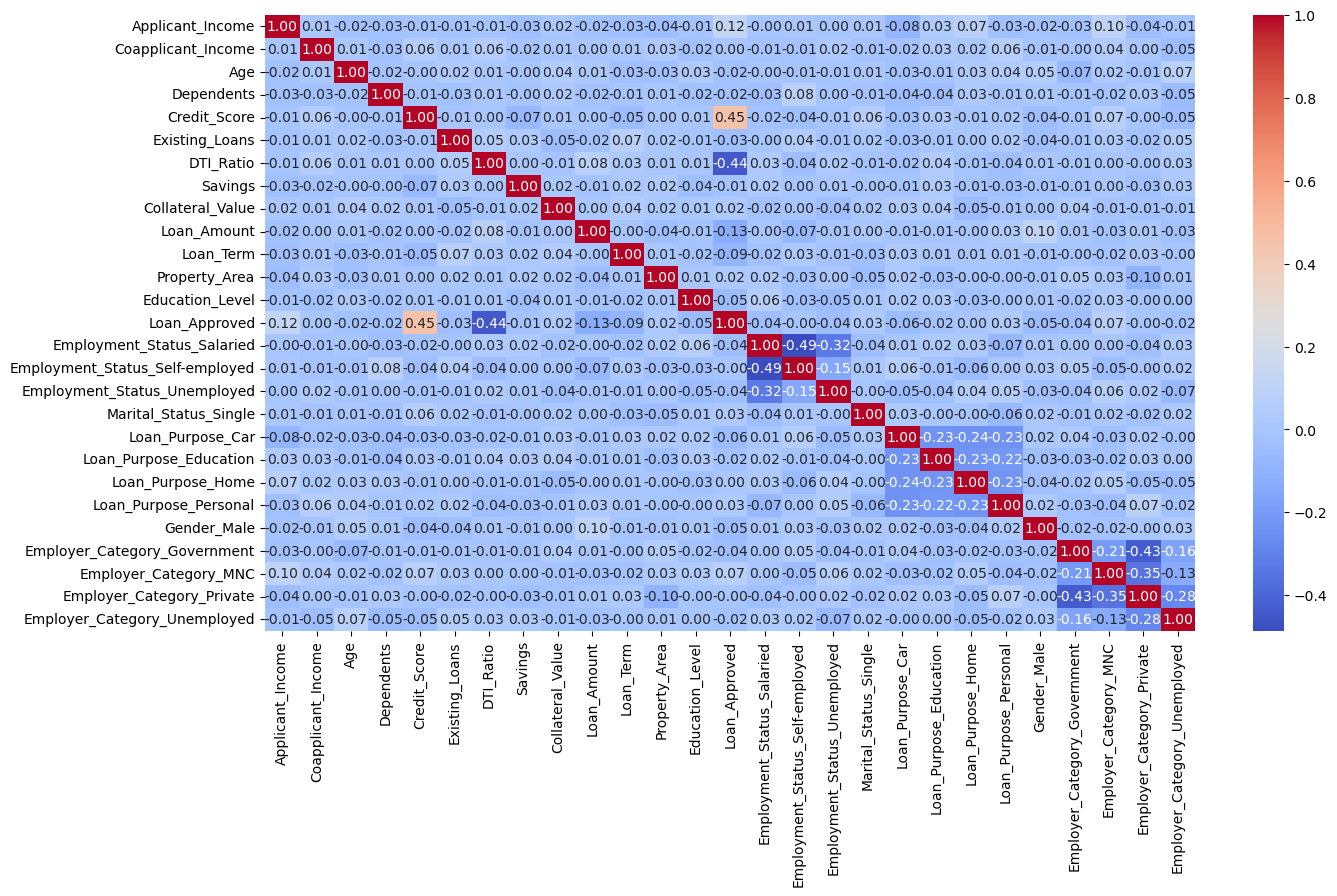

In [27]:
num_cols = df.select_dtypes(include="number")

corr_matrix = num_cols.corr()
plt.figure(figsize = (15,8))

sns.heatmap(
    corr_matrix,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm"
)

In [28]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area                      0.023921
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                   -0.052920
Gender_Male                     

In [29]:
X = df.drop("Loan_Approved", axis = 1)
y = df["Loan_Approved"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2,random_state = 42
)

In [31]:
df.head()
X_train.dtypes

Applicant_Income                   float64
Coapplicant_Income                 float64
Age                                float64
Dependents                         float64
Credit_Score                       float64
Existing_Loans                     float64
DTI_Ratio                          float64
Savings                            float64
Collateral_Value                   float64
Loan_Amount                        float64
Loan_Term                          float64
Property_Area                        int64
Education_Level                      int64
Employment_Status_Salaried         float64
Employment_Status_Self-employed    float64
Employment_Status_Unemployed       float64
Marital_Status_Single              float64
Loan_Purpose_Car                   float64
Loan_Purpose_Education             float64
Loan_Purpose_Home                  float64
Loan_Purpose_Personal              float64
Gender_Male                        float64
Employer_Category_Government       float64
Employer_Ca

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***
## Training and Evaluation
***

In [36]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)


LogisticRegression()

In [37]:
y_pred =log_model.predict(X_test_scaled)

# evaluate

print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("accuracy : ", accuracy_score(y_test, y_pred))
print("f1: ", f1_score(y_test, y_pred))
print("confusion matrix \n : ", confusion_matrix(y_test, y_pred))
      

Precision :  0.7966101694915254
Recall :  0.7704918032786885
accuracy :  0.87
f1:  0.7833333333333333
confusion matrix 
 :  [[127  12]
 [ 14  47]]


In [59]:
# KNN classifier

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [60]:
y_pred =knn_model.predict(X_test_scaled)

# evaluate

print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("accuracy : ", accuracy_score(y_test, y_pred))
print("f1: ", f1_score(y_test, y_pred))
print("confusion matrix \n : ", confusion_matrix(y_test, y_pred))
      

Precision :  0.6818181818181818
Recall :  0.4918032786885246
accuracy :  0.775
f1:  0.5714285714285714
confusion matrix 
 :  [[125  14]
 [ 31  30]]


In [52]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled,y_train)

GaussianNB()

In [53]:
y_pred =nb_model.predict(X_test_scaled)

# evaluate

print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("accuracy : ", accuracy_score(y_test, y_pred))
print("f1: ", f1_score(y_test, y_pred))
print("confusion matrix \n : ", confusion_matrix(y_test, y_pred))

Precision :  0.7966101694915254
Recall :  0.7704918032786885
accuracy :  0.87
f1:  0.7833333333333333
confusion matrix 
 :  [[127  12]
 [ 14  47]]


# feature engineering

In [54]:
# Add / Transform data

df["DTI_Ratio_sq"] = df["DTI_Ratio"] **2
df["Credit_Score_sq"] = df["Credit_Score"] **2

df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

X = df.drop(columns =["DTI_Ratio","Credit_Score","Loan_Approved","Applicant_Income"])
y = df["Loan_Approved"]

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2,random_state = 42
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [55]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)

y_pred =log_model.predict(X_test_scaled)

# evaluate

print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("accuracy : ", accuracy_score(y_test, y_pred))
print("f1: ", f1_score(y_test, y_pred))
print("confusion matrix \n : ", confusion_matrix(y_test, y_pred))
      

Precision :  0.8032786885245902
Recall :  0.8032786885245902
accuracy :  0.88
f1:  0.8032786885245902
confusion matrix 
 :  [[127  12]
 [ 12  49]]


In [57]:
# KNN classifier

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_scaled,y_train)

y_pred =knn_model.predict(X_test_scaled)

# evaluate

print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("accuracy : ", accuracy_score(y_test, y_pred))
print("f1: ", f1_score(y_test, y_pred))
print("confusion matrix \n : ", confusion_matrix(y_test, y_pred))

Precision :  0.6818181818181818
Recall :  0.4918032786885246
accuracy :  0.775
f1:  0.5714285714285714
confusion matrix 
 :  [[125  14]
 [ 31  30]]


In [61]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled,y_train)

y_pred =nb_model.predict(X_test_scaled)

# evaluate

print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("accuracy : ", accuracy_score(y_test, y_pred))
print("f1: ", f1_score(y_test, y_pred))
print("confusion matrix \n : ", confusion_matrix(y_test, y_pred))

Precision :  0.8
Recall :  0.7213114754098361
accuracy :  0.86
f1:  0.7586206896551724
confusion matrix 
 :  [[128  11]
 [ 17  44]]
